In [1]:
# mmcv를 위해서 mmcv-full을 먼저 설치해야 함. 
!pip install mmcv-full
# mmdetection 설치 
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

     |████████████████████████████████| 313 kB 15.6 MB/s 
     |████████████████████████████████| 185 kB 60.7 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.13-cp37-cp37m-linux_x86_64.whl size=29566331 sha256=eb0627c42b4ed823681c5a0ea29b49ee4ab43ae63a14db9938c61a509b2fecef
  Stored in directory: /root/.cache/pip/wheels/9d/13/23/7c772e752c5e05ef7fc7328dccefc152df8ab7bbf66b2ee59c
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 20955, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 20955 (delta 3), reused 6 (delta 0), pack-reused 20937
Receiving objects: 100% (20955/20955), 24.70 MiB | 29.41 MiB/s, done.
Resolving deltas: 100% (14662/14662), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writ

In [31]:
from mmdet.apis import init_detector, inference_detector
import mmcv 

In [32]:
# KITTI Dataset 다운로드
!wget https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
!unzip kitti_tiny.zip > /dev/null

--2021-09-23 02:19:25--  https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip.2’

kitti_tiny.zip.2    100%[===================>]   6.60M  7.71MB/s    in 0.9s    

2021-09-23 02:19:27 (7.71 MB/s) - ‘kitti_tiny.zip.2’ saved [6918271/6918271]

replace kitti_tiny/val.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


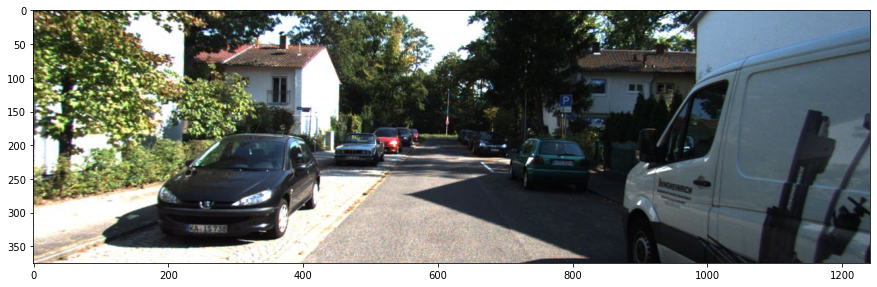

In [33]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/content/kitti_tiny/training/image_2/000053.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(img)

plt.show()

In [34]:
# KITTI DATA FORMAT 확인
# 첫번째 컬럼은 해당 오브젝트의 클래스 명.
# 5번째~8번째가 BOUNDING BOX 정보임. 좌상단(xmin, ymin), 우하단(xmax, ymax) 좌표 임.
!cat /content/kitti_tiny/training/label_2/000053.txt

Van 1.00 0 -2.32 865.23 0.00 1241.00 374.00 2.38 1.98 5.62 3.03 1.70 2.98 -1.58
Car 0.00 0 1.86 173.62 180.91 429.48 359.85 1.52 1.50 3.85 -3.19 1.62 8.15 1.49
Car 0.00 0 -1.79 707.54 185.88 834.49 271.76 1.43 1.59 3.68 2.97 1.70 14.21 -1.59
Car 0.00 0 1.70 444.83 180.67 519.74 231.01 1.29 1.59 4.12 -3.63 1.53 20.88 1.53
Car 0.00 1 1.64 499.17 171.42 546.19 212.24 1.52 1.61 3.59 -3.48 1.49 28.91 1.52
Car 0.00 0 1.46 653.39 176.60 706.53 216.76 1.51 1.65 4.28 2.76 1.68 29.57 1.55
Car 0.00 2 1.64 526.94 173.21 563.54 203.04 1.48 1.64 3.95 -3.40 1.52 38.08 1.55
DontCare -1 -1 -10 629.35 176.06 655.43 199.02 -1 -1 -1 -1000 -1000 -1000 -10
DontCare -1 -1 -10 552.27 177.10 575.23 195.89 -1 -1 -1 -1000 -1000 -1000 -10


In [35]:
#KITTI annotation파일들의 리스트들을 가지는 파일 확인
!cat /content/kitti_tiny/train.txt

000000
000001
000002
000003
000004
000005
000006
000007
000008
000009
000010
000011
000012
000013
000014
000015
000016
000017
000018
000019
000020
000021
000022
000023
000024
000025
000026
000027
000028
000029
000030
000031
000032
000033
000034
000035
000036
000037
000038
000039
000040
000041
000042
000043
000044
000045
000046
000047
000048
000049


## kitti Dataset을 중립 데이터형태로 변환하여 메모리 로드

In [36]:
# 원본 kitti Dataset는 10개의 Class로 되어 있음. 'Car Van Truck Pedestrian Person_sitting Cyclist Tram Misc DontCare'
CLASSES = ('Car', 'Truck', 'Pedestrian', 'Cyclist')
cat2label = {k:i for i, k in enumerate(CLASSES)}
print(cat2label)
cat2label['Car']

{'Car': 0, 'Truck': 1, 'Pedestrian': 2, 'Cyclist': 3}


0

In [37]:
image_list = mmcv.list_from_file('/content/kitti_tiny/train.txt')
image_list

['000000',
 '000001',
 '000002',
 '000003',
 '000004',
 '000005',
 '000006',
 '000007',
 '000008',
 '000009',
 '000010',
 '000011',
 '000012',
 '000013',
 '000014',
 '000015',
 '000016',
 '000017',
 '000018',
 '000019',
 '000020',
 '000021',
 '000022',
 '000023',
 '000024',
 '000025',
 '000026',
 '000027',
 '000028',
 '000029',
 '000030',
 '000031',
 '000032',
 '000033',
 '000034',
 '000035',
 '000036',
 '000037',
 '000038',
 '000039',
 '000040',
 '000041',
 '000042',
 '000043',
 '000044',
 '000045',
 '000046',
 '000047',
 '000048',
 '000049']

In [38]:
lines = mmcv.list_from_file('/content/kitti_tiny/training/label_2/000064.txt')
print(lines)
content = [line.strip().split(' ') for line in lines]
bbox_names = [x[0] for x in content]
print(bbox_names)
bboxes = [ [float(info) for info in x[4:8]] for x in content]
print(bboxes)

['Car 0.00 0 -1.70 657.65 179.93 709.86 219.92 1.38 1.49 3.32 2.65 1.65 26.82 -1.60', 'Car 0.00 0 -1.85 731.51 180.39 882.28 275.80 1.50 1.62 3.89 3.43 1.65 13.46 -1.60', 'Car 0.00 1 -1.83 715.18 175.63 762.77 203.90 1.44 1.56 3.96 6.91 1.61 39.17 -1.65', 'Truck 0.00 1 -2.01 816.58 59.74 1112.51 266.07 3.55 2.56 7.97 7.25 1.64 16.44 -1.60', 'DontCare -1 -1 -10 626.78 174.27 647.77 192.18 -1 -1 -1 -1000 -1000 -1000 -10', 'DontCare -1 -1 -10 546.19 168.97 554.01 177.09 -1 -1 -1 -1000 -1000 -1000 -10']
['Car', 'Car', 'Car', 'Truck', 'DontCare', 'DontCare']
[[657.65, 179.93, 709.86, 219.92], [731.51, 180.39, 882.28, 275.8], [715.18, 175.63, 762.77, 203.9], [816.58, 59.74, 1112.51, 266.07], [626.78, 174.27, 647.77, 192.18], [546.19, 168.97, 554.01, 177.09]]


In [39]:
import copy
import os.path as osp
import cv2

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

# 반드시 아래 Decorator 설정 할것.@DATASETS.register_module() 설정 시 force=True를 입력하지 않으면 Dataset 재등록 불가. 
@DATASETS.register_module(force=True)
class KittyTinyDataset(CustomDataset):
  CLASSES = ('Car', 'Truck', 'Pedestrian', 'Cyclist')
  
  ##### self.data_root: /content/kitti_tiny/ self.ann_file: /content/kitti_tiny/train.txt self.img_prefix: /content/kitti_tiny/training/image_2
  #### ann_file: /content/kitti_tiny/train.txt
  # annotation에 대한 모든 파일명을 가지고 있는 텍스트 파일을 __init__(self, ann_file)로 입력 받고, 이 self.ann_file이 load_annotations()의 인자로 입력
  def load_annotations(self, ann_file):
    print('##### self.data_root:', self.data_root, 'self.ann_file:', self.ann_file, 'self.img_prefix:', self.img_prefix)
    print('#### ann_file:', ann_file)
    cat2label = {k:i for i, k in enumerate(self.CLASSES)}
    image_list = mmcv.list_from_file(self.ann_file)
    # 포맷 중립 데이터를 담을 list 객체
    data_infos = []
    
    for image_id in image_list:
      filename = '{0:}/{1:}.jpeg'.format(self.img_prefix, image_id)
      # 원본 이미지의 너비, 높이를 image를 직접 로드하여 구함. 
      image = cv2.imread(filename)
      height, width = image.shape[:2]
      # 개별 image의 annotation 정보 저장용 Dict 생성. key값 filename 에는 image의 파일명만 들어감(디렉토리는 제외)
      data_info = {'filename': str(image_id) + '.jpeg',
                   'width': width, 'height': height}
      # 개별 annotation이 있는 서브 디렉토리의 prefix 변환. 
      label_prefix = self.img_prefix.replace('image_2', 'label_2')
      # 개별 annotation 파일을 1개 line 씩 읽어서 list 로드 
      lines = mmcv.list_from_file(osp.join(label_prefix, str(image_id)+'.txt'))

      # 전체 lines를 개별 line별 공백 레벨로 parsing 하여 다시 list로 저장. content는 list의 list형태임.
      # ann 정보는 numpy array로 저장되나 텍스트 처리나 데이터 가공이 list 가 편하므로 일차적으로 list로 변환 수행.
      content = [line.strip().split(' ') for line in lines]
      # 오브젝트의 클래스명은 bbox_names로 저장. 
      bbox_names = [x[0] for x in content]
      # bbox 좌표를 저장
      bboxes = [ [float(info) for info in x[4:8]] for x in content]

      # 클래스명이 해당 사항이 없는 대상 Filtering out, 'DontCare'sms ignore로 별도 저장.
      gt_bboxes = []
      gt_labels = []
      gt_bboxes_ignore = []
      gt_labels_ignore = []

      for bbox_name, bbox in zip(bbox_names, bboxes):
        # 만약 bbox_name이 클래스명에 해당 되면, gt_bboxes와 gt_labels에 추가, 그렇지 않으면 gt_bboxes_ignore, gt_labels_ignore에 추가
        if bbox_name in cat2label:
          gt_bboxes.append(bbox)
          # gt_labels에는 class id를 입력
          gt_labels.append(cat2label[bbox_name])
        else:
          gt_bboxes_ignore.append(bbox)
          gt_labels_ignore.append(-1)
      # 개별 image별 annotation 정보를 가지는 Dict 생성. 해당 Dict의 value값은 모두 np.array임. 
      data_anno = {
          'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
          'labels': np.array(gt_labels, dtype=np.long),
          'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
          'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
      }
      # image에 대한 메타 정보를 가지는 data_info Dict에 'ann' key값으로 data_anno를 value로 저장. 
      data_info.update(ann=data_anno)
      # 전체 annotation 파일들에 대한 정보를 가지는 data_infos에 data_info Dict를 추가
      data_infos.append(data_info)

    return data_infos

In [40]:
### Config 설정하고 Pretrained 모델 다운로드
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth' 

In [41]:
!cd mmdetection; mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-09-23 02:19:48--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  7.19MB/s    in 23s     

2021-09-23 02:20:12 (7.05 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [42]:
!ls -lia /content/mmdetection/checkpoints

total 163376
4853078 drwxr-xr-x  2 root root      4096 Sep 22 23:53 .
4849666 drwxr-xr-x 19 root root      4096 Sep 22 23:53 ..
4853079 -rw-r--r--  1 root root 167287506 Aug 28  2020 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [43]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [55]:

from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'KittyTinyDataset'
cfg.data_root = '/content/kitti_tiny/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'KittyTinyDataset'
cfg.data.train.data_root = '/content/kitti_tiny/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'KittyTinyDataset'
cfg.data.val.data_root = '/content/kitti_tiny/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

cfg.data.test.type = 'KittyTinyDataset'
cfg.data.test.data_root = '/content/kitti_tiny/'
cfg.data.test.ann_file = 'val.txt'
cfg.data.test.img_prefix = 'training/image_2'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 4
# pretrained 모델
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8

cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# config 수행 시마다 policy값이 없어지는 bug로 인하여 설정. 
cfg.lr_config.policy = 'step'

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

## Config에서 설정한 Dataset과 Model, 동적 학습율, Pipeline 설정에 따라 모델 학습 수행.
- train용 Dataset을 생성하고 이를 이용하여 학습 수행.

In [56]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성. 
datasets = [build_dataset(cfg.data.train)]

##### self.data_root: /content/kitti_tiny/ self.ann_file: /content/kitti_tiny/train.txt self.img_prefix: /content/kitti_tiny/training/image_2
#### ann_file: /content/kitti_tiny/train.txt


/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/datasets/custom.py:157: UserWarning: CustomDataset does not support filtering empty gt images.
  'CustomDataset does not support filtering empty gt images.')


In [57]:
datasets

[
 KittyTinyDataset Train dataset with number of images 50, and instance counts: 
 +----------+-------+-----------+-------+----------------+-------+-------------+-------+---------------+-------+
 | category | count | category  | count | category       | count | category    | count | category      | count |
 +----------+-------+-----------+-------+----------------+-------+-------------+-------+---------------+-------+
 | 0 [Car]  | 147   | 1 [Truck] | 7     | 2 [Pedestrian] | 23    | 3 [Cyclist] | 7     | -1 background | 0     |
 +----------+-------+-----------+-------+----------------+-------+-------------+-------+---------------+-------+]

In [58]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


In [59]:
# 주의, config에 pretrained 모델 지정이 상대 경로로 설정됨 cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
# 아래와 같이 %cd mmdetection 지정 필요. 

%cd mmdetection

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

# epochs는 config의 runner 파라미터로 지정됨. 기본 12회 
train_detector(model, datasets, cfg, distributed=False, validate=True)

[Errno 2] No such file or directory: 'mmdetection'
/content/mmdetection
##### self.data_root: /content/kitti_tiny/ self.ann_file: /content/kitti_tiny/val.txt self.img_prefix: /content/kitti_tiny/training/image_2
#### ann_file: /content/kitti_tiny/val.txt


2021-09-23 02:37:38,837 - mmdet - INFO - load checkpoint from checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2021-09-23 02:37:38,838 - mmdet - INFO - Use load_from_local loader
2021-09-23 02:37:38,970 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([5, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([5]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([16, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([16]).
2021-09-23 02:37:38,974 - mmdet - INFO - Start

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 25/25, 11.1 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2021-09-23 02:39:55,379 - mmdet - INFO - 
+------------+-----+------+--------+-------+
| class      | gts | dets | recall | ap    |
+------------+-----+------+--------+-------+
| Car        | 62  | 150  | 0.935  | 0.837 |
| Truck      | 3   | 20   | 1.000  | 0.600 |
| Pedestrian | 13  | 52   | 0.923  | 0.785 |
| Cyclist    | 7   | 49   | 0.714  | 0.174 |
+------------+-----+------+--------+-------+
| mAP        |     |      |        | 0.599 |
+------------+-----+------+--------+-------+
2021-09-23 02:39:55,381 - mmdet - INFO - Epoch(val) [12][25]	AP50: 0.5990, mAP: 0.5987


## 학습된 model을 이용하여 inference 수행

/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


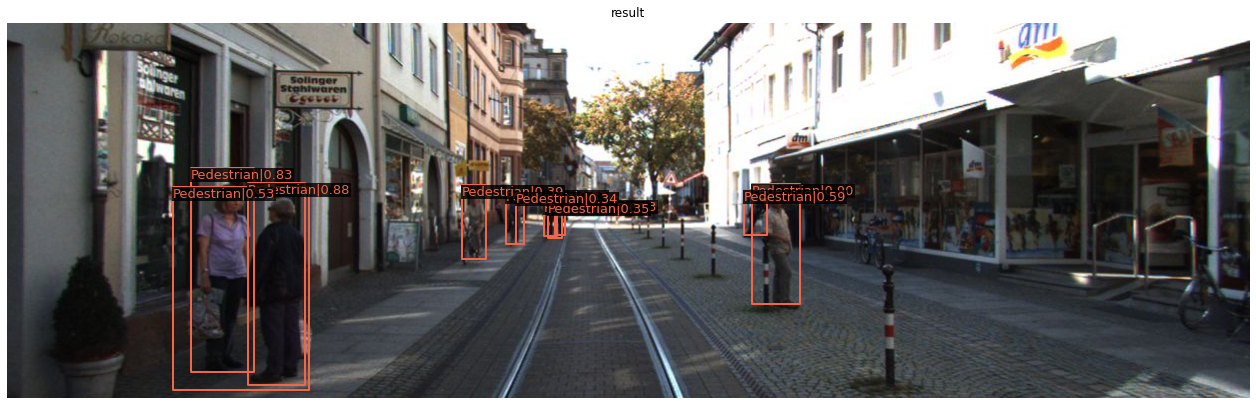

In [64]:
from mmdet.apis import inference_detector, show_result_pyplot

# BGR image
img = cv2.imread('/content/kitti_tiny/training/image_2/000073.jpeg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

In [66]:
result

[array([], shape=(0, 5), dtype=float32),
 array([[5.3713470e+02, 1.8130978e+02, 5.4889569e+02, 2.1401344e+02,
         6.4660408e-02],
        [2.2936964e+02, 1.7551617e+02, 3.1441599e+02, 3.3882632e+02,
         5.2487522e-02]], dtype=float32),
 array([[7.4456482e+02, 1.6125160e+02, 7.9273871e+02, 2.8101340e+02,
         9.0401274e-01],
        [2.4026961e+02, 1.6068811e+02, 2.9765842e+02, 3.6242484e+02,
         8.7702709e-01],
        [1.8306035e+02, 1.4524835e+02, 2.4672256e+02, 3.4924133e+02,
         8.3011436e-01],
        [4.9884671e+02, 1.6737881e+02, 5.1650299e+02, 2.2178563e+02,
         8.2876223e-01],
        [5.4714691e+02, 1.7726833e+02, 5.5776178e+02, 2.1233971e+02,
         6.2861812e-01],
        [5.3699951e+02, 1.7844031e+02, 5.4932178e+02, 2.1302483e+02,
         5.9508067e-01],
        [7.3637341e+02, 1.6716302e+02, 7.5924170e+02, 2.1269473e+02,
         5.8559382e-01],
        [1.6596355e+02, 1.6462894e+02, 3.0123761e+02, 3.6717108e+02,
         5.2518117e-01],
  

## 학습된 모델을 이용한 Video Detection

In [67]:
%cd /content
!mkdir /content/data
!wget -O /content/data/the_rock_chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/the_rock_chase.mp4?raw=true

/content
--2021-09-23 02:57:52--  https://github.com/chulminkw/DLCV/blob/master/data/video/the_rock_chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/the_rock_chase.mp4 [following]
--2021-09-23 02:57:52--  https://github.com/chulminkw/DLCV/raw/master/data/video/the_rock_chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/the_rock_chase.mp4 [following]
--2021-09-23 02:57:52--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/the_rock_chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [70]:
CLASSES = ('Car', 'Truck', 'Pedestrian', 'Cyclist')
labels_to_names_seq = {i:k for i, k in enumerate(CLASSES)}
labels_to_names_seq

{0: 'Car', 1: 'Truck', 2: 'Pedestrian', 3: 'Cyclist'}

In [91]:
def get_detected_img(model, img_array, score_threshold=0.3, is_print=True):
    draw_img = img_array.copy()
    bbox_color = (0, 255, 0)
    text_color = (0, 0, 255)

    results = inference_detector(model, img_array)

    for result_idx, result in enumerate(results):
        if len(result) == 0:
            continue
        
        result_filtered = result[np.where(result[:, 4] > score_threshold)]

        for filtered in result_filtered:
            # 좌상단, 우하단 좌표 추출.
            left = int(filtered[0])
            top = int(filtered[1])
            right = int(filtered[2])
            bottom = int(filtered[3])
            caption = f"{labels_to_names_seq[result_idx]}: {filtered[4]:.4f}"
            cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
            cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.37, color=text_color, thickness=1)
            if is_print:
                print(caption)
    return draw_img

In [92]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):

    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)
    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    btime = time.time()
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다')
            break
        stime = time.time()
        img_frame = get_detected_img(model, img_frame,  score_threshold=score_threshold, is_print=False)
        if do_print:
          print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))

In [94]:
do_detected_video(model, '/content/data/the_rock_chase.mp4', '/content/data/the_rock_chase_out1.mp4', score_threshold=0.3, do_print=True)

총 Frame 갯수: 503
frame별 detection 수행 시간: 0.1779


/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.16.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


frame별 detection 수행 시간: 0.127
frame별 detection 수행 시간: 0.1196
frame별 detection 수행 시간: 0.1152
frame별 detection 수행 시간: 0.119
frame별 detection 수행 시간: 0.1144
frame별 detection 수행 시간: 0.116
frame별 detection 수행 시간: 0.1147
frame별 detection 수행 시간: 0.1152
frame별 detection 수행 시간: 0.1136
frame별 detection 수행 시간: 0.116
frame별 detection 수행 시간: 0.1141
frame별 detection 수행 시간: 0.1119
frame별 detection 수행 시간: 0.117
frame별 detection 수행 시간: 0.1135
frame별 detection 수행 시간: 0.1158
frame별 detection 수행 시간: 0.1141
frame별 detection 수행 시간: 0.1147
frame별 detection 수행 시간: 0.1152
frame별 detection 수행 시간: 0.1126
frame별 detection 수행 시간: 0.1137
frame별 detection 수행 시간: 0.1142
frame별 detection 수행 시간: 0.1124
frame별 detection 수행 시간: 0.1124
frame별 detection 수행 시간: 0.1131
frame별 detection 수행 시간: 0.1131
frame별 detection 수행 시간: 0.1207
frame별 detection 수행 시간: 0.1147
frame별 detection 수행 시간: 0.1135
frame별 detection 수행 시간: 0.1129
frame별 detection 수행 시간: 0.1125
frame별 detection 수행 시간: 0.1124
frame별 detection 수행 시간: 0.1129
frame별 detect